In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, foldnorm, bernoulli, uniform
from scipy.optimize import minimize

# №1

Разыграть случайную точку на единичной окружности. Оценить математическое ожидание модуля абсциссы.

In [12]:
def sampleInCircle(sampleSize, radius=1):
    angleList = uniform.rvs(0, 2 * np.pi, size=sampleSize)
    x_list = [radius * np.cos(angle) for angle in angleList]
    y_list = [radius * np.sin(angle) for angle in angleList]
    return list(zip(x_list, y_list))

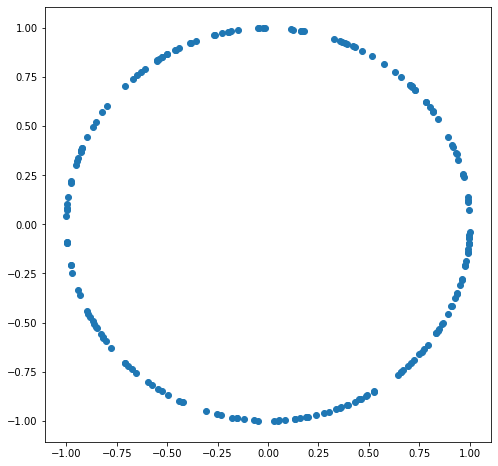

In [13]:
numOfSamples = 200
listOfSamples = sampleInCircle(numOfSamples)
x = [point[0] for point in listOfSamples]
y = [point[1] for point in listOfSamples]
plt.figure(figsize=(8,8))
plt.scatter(x, y)

In [14]:
ExpectationEstimation = sum(np.abs(x)) / len(x)
print('Estimation of |x| expectation: {:.3f}'.format(ExpectationEstimation))

Estimation of |x| expectation: 0.639


# №2

Построить выборку из 100 величин, имеющих распределение модуля стандартной
нормальной величины, используя Rejection Method и экспоненциальное распределение. Сделать из них нормальное распределение.

In [3]:
#с = 0, loc = 0, scale = 1
bnds = (0, np.inf)
negativeRatioPdf = lambda x: -1 * foldnorm.pdf(x, c=0, scale=1) / expon.pdf(x)
maxOfRatio = minimize(negativeRatioPdf, x0=[0.1], method='Nelder-Mead', bounds=bnds)

/home/dkorzhimanov/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


In [4]:
c = -1 * maxOfRatio.fun
probFunction = lambda x: foldnorm.pdf(x, c=0, scale=1) / (c * expon.pdf(x))

In [5]:
numOfSamples = 100
foldedNormSamples = []
while len(foldedNormSamples) < numOfSamples:
    exponSample = expon.rvs()
    curProbability = probFunction(exponSample)
    bernSample = bernoulli.rvs(curProbability)
    if bernSample == 1:
        foldedNormSamples.append(exponSample)

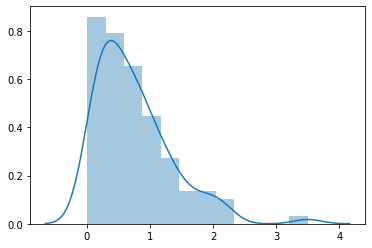

In [6]:
sns.distplot(foldedNormSamples, label='pdf of folded norm dist')

In [7]:
#делаем стандартные нормальные с.в. 
positiveOrNegativeArray = np.array(random.choices([-1, 1], k=numOfSamples))
normDistrSamples = positiveOrNegativeArray  * np.array(foldedNormSamples)

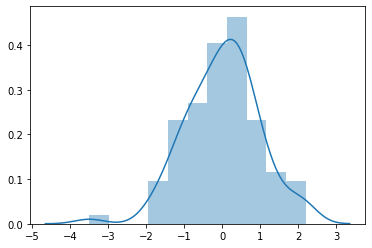

In [8]:
sns.distplot(normDistrSamples)

# №3

При создании карты в компьютерной игре мы должны разместить на карте размера 100 на 100 пять городов, а затем десять шахт так, чтобы:

а) расстояние между городами было не меньше 40.

б) каждому городу нужно сопоставить две шахты на расстоянии не менее 10 и не более
20, так чтобы расстояние между любым шахтами было не меньше 10.

Создать генератор карт.

In [9]:
def map_generator(map_size=100, num_of_cities=5, num_of_mines=2):
    cities_dict = dict()
    mines_dict = dict()
    for i in range(num_of_cities):
        cities_dict[i] = uniform.rvs(loc=0, scale=map_size, size=(1, 2))
        mines_dict[i] = uniform.rvs(loc=0, scale=map_size, size=(num_of_mines, 2))
    for key in cities_dict.keys():
        cur_city = cities_dict[key]
        while True:
            check_counter = 0
            for other_key in cities_dict.keys():
                city_to_check = cities_dict[other_key]
                condition_ind = (np.linalg.norm(cur_city - city_to_check) >= 40)
                check_counter += int(condition_ind)
            if check_counter < num_of_cities - 1:
                cities_dict[key] = uniform.rvs(loc=0, scale=map_size, size=(1, 2))
                cur_city = cities_dict[key]
            else:
                break
        for i in range(num_of_mines):
            cur_mine = mines_dict[key][i]
            while True:
                check_counter = 0
                city_condition_ind = (10 <= np.linalg.norm(cur_mine - cur_city) <= 20)      
                check_counter += int(city_condition_ind)
                for other_key in cities_dict.keys():
                    for j in range(num_of_mines):
                        mine_to_check = mines_dict[other_key][j]
                        mine_condition_ind = (np.linalg.norm(mine_to_check - cur_mine) >= 10)
                        check_counter += int(mine_condition_ind)
                if check_counter < num_of_cities * num_of_mines:
                    mines_dict[key][i] = uniform.rvs(loc=0, scale=map_size, size=(1, 2))
                    cur_mine = mines_dict[key][i]
                else:
                    break
    cities_coordinates = list(cities_dict.values())
    mines_coordinates = list(mines_dict.values())
    return (cities_coordinates, mines_coordinates)

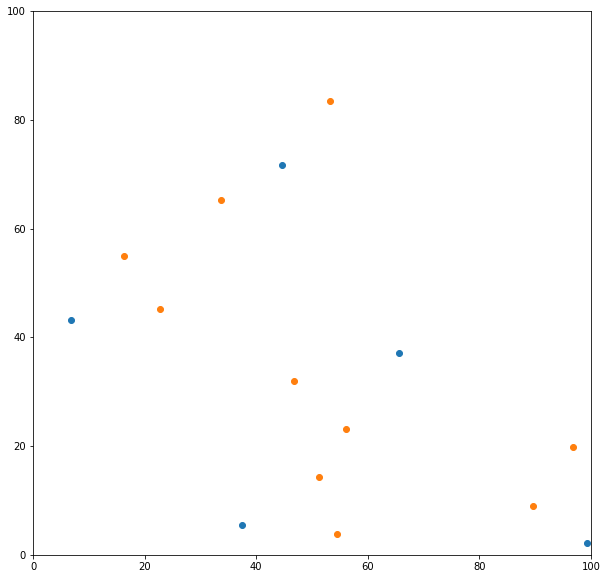

In [10]:
#синяя точка - город, оранжевая точка - шахта
cities, mines = map_generator()
cities = np.array(cities)
mines = np.array(mines)
x_cities, y_cities = cities.T
x_mines, y_mines = mines.T
plt.figure(figsize=(10, 10))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(x_cities, y_cities)
plt.scatter(x_mines, y_mines)